<a href="https://colab.research.google.com/github/DADDY2260/Plant-Disease-Detection/blob/main/Plant_Disease_Detection_Clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 Plant Disease Detection using CNN (MobileNetV2)
---
This notebook implements a plant disease classifier using TensorFlow and MobileNetV2 with transfer learning.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import os

In [ ]:
dataset_dir = '/content/drive/MyDrive/PlantDiseaseDataset/PlantVillage'
train_dir = dataset_dir  # assuming you’ve already split it into training/validation if needed

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,589,775 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  5/517 ━━━━━━━━━━━━━━━━━━━━ 50:39 6s/step - accuracy: 0.1172 - loss: 2.8442

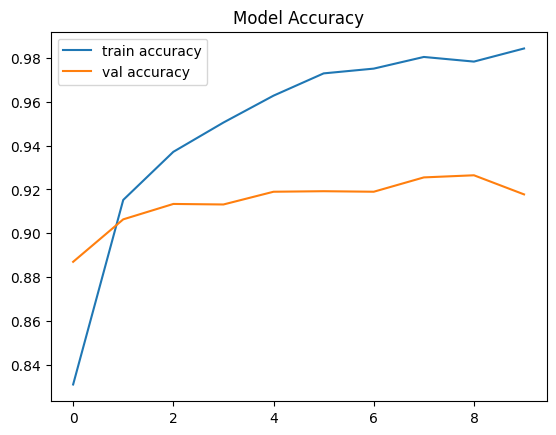

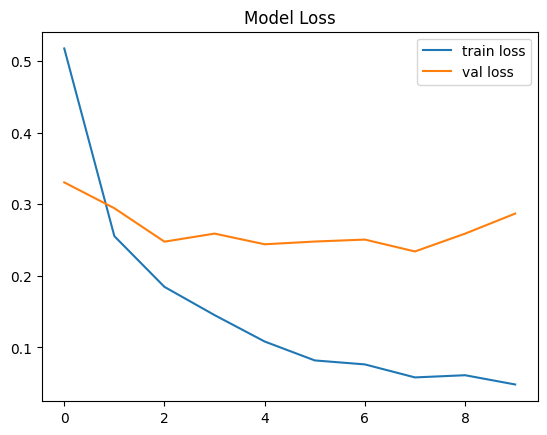

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
model.save("plant_disease_model.h5")

NameError: name 'model' is not defined

In [ ]:
print(train_generator.class_indices)


{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}


In [ ]:
pip install streamlit tensorflow pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,589,777 (9.88 MB)

 Trainable params: 331,791 (1.27 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving plant_disease_model.h5 to plant_disease_model.h5


In [ ]:
import os
print(os.listdir())

['.config', 'plant_disease_model.h5', 'sample_data']


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("plant_disease_model.h5")


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the trained model
model = load_model("plant_disease_model.h5")

# Define class names (update based on your model)
class_names = [
    'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight',
    'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
    'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite',
    'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'
]

# Streamlit page configuration
st.title("🌿 Plant Disease Detection")
st.write("Upload a leaf image and let the model predict the disease.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image.', use_column_width=True)

    # Preprocess the image (resize, convert to array, normalize)
    img = img.resize((224, 224))  # Resize to match model's expected input size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize if the model was trained on normalized images

    # Make prediction
    prediction = model.predict(img_array)

    # Print the prediction shape for debugging
    print(prediction.shape)

    # Get the class with the highest probability
    predicted_class = class_names[np.argmax(prediction)]

    # Display the predicted class
    st.write(f"Predicted Disease: {predicted_class}")



2025-04-15 19:31:16.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.317 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.322 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-15 19:31:16.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip install pyngrok


In [ ]:
!ngrok authtoken 2vmK0x60OxhkLptKoDQ0vjRhZ1x_3tmvup3DN8ZKu1Z5jnL93

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("plant_disease_model.h5")
print(model.output_shape)


(None, 15)


In [ ]:
!streamlit run app.py &>/content/logs.txt &
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(public_url)


NgrokTunnel: "https://b410-34-138-217-129.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
prediction = model.predict(img_array)
print(prediction.shape)  # Check the shape of the prediction


NameError: name 'img_array' is not defined

In [ ]:
from pyngrok import ngrok
import os

# Start Streamlit app in background
os.system("streamlit run app.py &")

# Connect ngrok tunnel
public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)


Streamlit app is live at: NgrokTunnel: "https://5589-34-138-217-129.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.138.217.129:8501

  Stopping...
  Stopping...


In [ ]:
!killall streamlit
!killall ngrok


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2vmK0x60OxhkLptKoDQ0vjRhZ1x_3tmvup3DN8ZKu1Z5jnL93")


In [ ]:
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://1bdb-34-138-217-129.ngrok-free.app" -> "http://localhost:8501"
